# Text Mining - Exploration

How to deal with variables like: *natural language*.

In [11]:
# loading packages
library(tidyverse)
library(tidytext)
library(janeaustenr)
library(stringr)

I'll load Jane Austen books from the package janeaustenr and do some cleaning.

In [2]:
original_books <- austen_books() %>%
  group_by(book) %>%
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]",
                                                 ignore_case = TRUE)))) %>%
  ungroup()

In [3]:
original_books

text,book,linenumber,chapter
<chr>,<fct>,<int>,<int>
SENSE AND SENSIBILITY,Sense & Sensibility,1,0
,Sense & Sensibility,2,0
by Jane Austen,Sense & Sensibility,3,0
,Sense & Sensibility,4,0
(1811),Sense & Sensibility,5,0
,Sense & Sensibility,6,0
,Sense & Sensibility,7,0
,Sense & Sensibility,8,0
,Sense & Sensibility,9,0


Now I'll change the form of the dataframe using a function from the `tidytext` package called the `unnest_tokens()` function.

In [4]:
tidy_books <- original_books %>%
  unnest_tokens(word, text)

In [5]:
tidy_books

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,and
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,by
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen
Sense & Sensibility,5,0,1811
Sense & Sensibility,10,1,chapter
Sense & Sensibility,10,1,1


The function separates all the words from the text lines.

Nexr I will display the words more used in all the books:

In [23]:
# first create a table of frequency of the words
words = table(tidy_books$word)

In [7]:
# omitting NAs and omitting all the words with frequency > than
wd = na.omit(words[words > dim(words)/6])
wd


    a   all   and    as    at    be  been   but    by could   for  from   had 
13408  3871 22515  7033  4751  8163  3255  5866  3545  3613  6648  2795  7322 
 have    he   her   him   his     i    in    is    it    mr   mrs    my    no 
 5259  7292 13055  3601  5947 12006 11217  4746 10234  3015  2446  3206  3185 
  not    of    on   she    so  that   the  they  this    to  very   was  were 
 8531 21178  3655 10137  3898  8009 26351  2983  2452 24044  3752 11204  3006 
 what which  with would   you 
 2471  3112  5916  3238  7631 

In [24]:
# creating a data.frame and ordering by word frequency
ws = as.data.frame(wd)
ord_ws = ws[order(-ws$Freq),] 
head(ord_ws)

[1] 44  2

,Var1,Freq
,<fct>,<int>
33,the,26351
36,to,24044
3,and,22515
28,of,21178
1,a,13408
16,her,13055


Now we can see the first 6 words with the most frequency count in all the books. Let's plot:

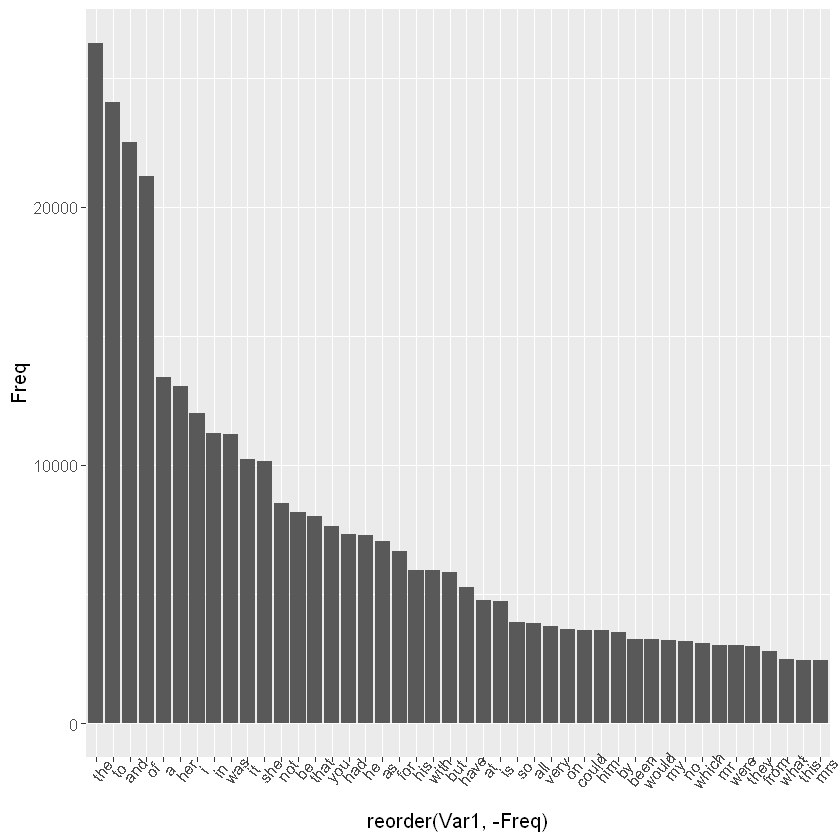

In [22]:
ggplot(ord_ws, aes(x = reorder (Var1, -Freq), y = Freq)) +
    geom_bar(stat = "identity") +
    theme(text = element_text(size = 12), axis.text.x = element_text(angle = 50))